In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

In [49]:
## constant
hbar = 6.63e-34;
me = 1.6e-31;

print(hbar**2/(me*(1e-9)**2))

2.7473062499999997e-18


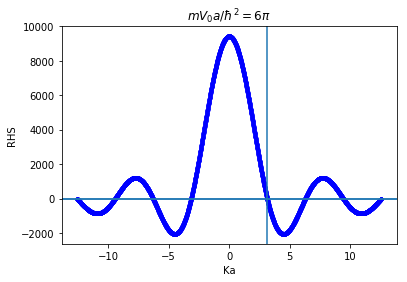

3.673727988484643e-13


In [196]:
P = 2e3*(3*np.pi/2); # larger P gives us more solution...
KA_scan = np.linspace(-4*np.pi, 4*np.pi, 4000);

plt.figure();
plt.plot(KA_scan, np.cos(KA_scan)+(P/(KA_scan))*np.sin(KA_scan), '.b')
plt.axhline(1);
plt.axhline(-1);
plt.axvline(np.pi)
plt.xlabel('Ka');
plt.ylabel('RHS')
plt.title('$mV_0a/\hbar^2 = 6\pi$')
plt.savefig('solving_kp_transcendental.png', dpi = 300)
plt.show();

def RHS(x):
    return np.cos(x)+(P/(x))*np.sin(x);

## roots at pi
print(RHS(np.pi)+1)

## Notes on the Transcendental Eq.
The solutions are values for which the  value of the root func is less than 1. Cuz then we can solve the left hand side.

In [90]:
def RHS(x):
    return np.cos(x)+(P/(x))*np.sin(x);

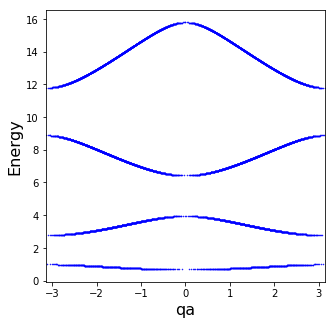

In [157]:
## do a scan of K...
Kguesses = np.linspace(1e-3,4*np.pi, 10000);
band_structure = [];
for kguess in Kguesses:
    val = RHS(kguess);
    if(abs(val) <1):
        q = np.arccos(val);
        E = kguess**2;
        band_structure.append([q,E]);
band_structure = np.array(band_structure);

plt.figure(figsize = (5,5))
alpha = 0.1;
plt.plot(band_structure[:,0], alpha*band_structure[:,1], '.b', markersize = 1);
plt.plot(-band_structure[:,0], alpha*band_structure[:,1], '.b', markersize = 1);

# plt.plot(Kguesses, alpha*Kguesses**2, '.c', markersize = 0.1);
# plt.plot(-Kguesses, alpha*Kguesses**2, '.c', markersize = 0.1);

# plt.axvline(np.pi, linestyle = '--')
# plt.axvline(-np.pi, linestyle = '--')
plt.xlabel('qa', fontsize = 16);
plt.ylabel('Energy', fontsize = 16)
plt.xlim((-np.pi, np.pi))
plt.savefig('Konig_Penny_bands.png', dpi = 300)
plt.show();
    


## wave function solutions
When we force the determinant of the matrix to be 0, then the rows of the matrix are linearly independent with respect to each other. In that regards, once we figure out the matrix equation, we cannot resolve any further relations on the four coefficients (A,B,C,D)

-1.1102230246251565e-16
5.551115123125783e-17
0.0


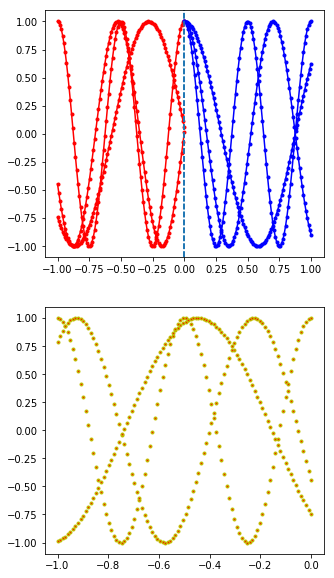

In [194]:
## do a scan of K...
plt.figure(figsize = (5,10));
Kguesses = np.linspace(1e-3,4*np.pi, 8);
for kguess in Kguesses:
    val = RHS(kguess);
    if(abs(val) <1):
        q = np.arccos(val);
        E = kguess**2;
        x2 = np.linspace(0,1, 100); #a has been 1 in everything we've done
        x1 = np.linspace(-1, 0, 100);
        xtot = np.linspace(-1, 1, 100);
        C = 1; D = 0;
        print(np.cos(q) - RHS(kguess))
        A = C*np.exp(1j*q)*np.exp(1j*kguess);
        B = D*np.exp(1j*q)*np.exp(-1j*kguess);
        
        ## true wavefunction reconstruction
        psi1 = A*np.exp(1j*kguess*(x1)) + B*np.exp(-1j*kguess*(x1))
        psi2 = C*np.exp(1j*kguess*x2) + D*np.exp(-1j*kguess*x2)
        
        ## check that the bloch boundary is satisfied
        psi_check = A*np.exp(1j*kguess*(x1-1)) + B*np.exp(-1j*kguess*(x1-1))
        psi_check_2 = ( C*np.exp(1j*kguess*x1) + D*np.exp(-1j*kguess*x1))*np.exp(1j*q)
        
        ## we should not be able to do this..
        psi_test = A*np.exp(1j*kguess*(xtot)) + B*np.exp(-1j*kguess*(xtot))
        psi_test2 =  C*np.exp(1j*kguess*xtot) + D*np.exp(-1j*kguess*xtot)
        plt.subplot(211);
        plt.plot(x1, psi1, '.-r');
        plt.plot(x2, psi2, '.-b');
        #plt.plot(xtot, psi_test, '.-b')
        #plt.plot(xtot, psi_test2, '.-r')
        plt.axvline(0, linestyle = '--')

        plt.subplot(212)
        plt.plot(x1, psi_check, '.y')
        plt.plot(x1, psi_check_2, '.r', markersize = 0.9)

        
plt.show();

## negative sign of the potential

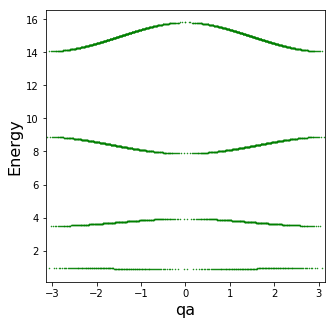

In [201]:
def RHS_flip(x):
    P = 10*np.pi;
    return np.cos(x)+(P/(x))*np.sin(x);

## do a scan of K...
Kguesses = np.linspace(1e-3,4*np.pi, 10000);
band_structure = [];
for kguess in Kguesses:
    val = RHS_flip(kguess);
    if(abs(val) <1):
        q = np.arccos(val);
        E = kguess**2;
        band_structure.append([q,E]);
band_structure = np.array(band_structure);

plt.figure(figsize = (5,5))
alpha = 0.1;
plt.plot(band_structure[:,0], alpha*band_structure[:,1], '.g', markersize = 1);
plt.plot(-band_structure[:,0], alpha*band_structure[:,1], '.g', markersize = 1);

# plt.plot(Kguesses, alpha*Kguesses**2, '.c', markersize = 0.1);
# plt.plot(-Kguesses, alpha*Kguesses**2, '.c', markersize = 0.1);

# plt.axvline(np.pi, linestyle = '--')
# plt.axvline(-np.pi, linestyle = '--')
plt.xlabel('qa', fontsize = 16);
plt.ylabel('Energy', fontsize = 16)
plt.xlim((-np.pi, np.pi))
plt.savefig('Konig_Penny_well_bands.png', dpi = 300)
plt.show();
    
